In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import numpy as np
import tkinter
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from statistics import mean
from statistics import stdev as std
import statsmodels.formula.api as sm
pd.set_option("display.max_columns", None)
import statsmodels.api as sm
import matplotlib
import warnings
import statistics

warnings.filterwarnings('ignore')
%matplotlib inline

def merge_fix_cols(df_company,dfroduct,uniqueID):## merge 2 dataframes and remove the duplicate ## 

    df_merged = pd.merge(df_company,
                         dfroduct,
                         how='left',on=uniqueID)    
    for col in df_merged:
        if col.endswith('_x'):
            df_merged.rename(columns = lambda col:col.rstrip('_x'),inplace=True)
        elif col.endswith('_y'):
            to_drop = [col for col in df_merged if col.endswith('_y')]
            df_merged.drop(to_drop,axis=1,inplace=True)
        else:
            pass
    return df_merged




# Auto backward Elimination fucntion##
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(1, numVars):## start from one skip on the intercept ## 
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    print("Reomoved col ",(columns[j]))
                    columns = np.delete(columns, j)
                    
                    
    regressor_OLS.summary()
    return x, columns


def adj_r2 (X,y,yred):
    r_squared=r2_score(y,yred)
    r=(1-r_squared)
    adjusted_r_squared = 1 - (1-r)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return adjusted_r_squared

In [2]:
dataset = pd.read_excel("data - DCB.xlsx") ## read the csv file ## 
dataset
dataset=dataset.drop(['Unnamed: 0'], axis=1)
dataset=dataset.drop(['Unnamed: 1'], axis=1)
dataset = dataset.drop(dataset.index[[0, 1]])

dataset
dataset=dataset.dropna()

In [3]:
dataset=dataset.rename(columns = { "Unnamed: 2":"Model Properties change" ,
                                  "Unnamed: 3":"UD:E_A",
                                  "Unnamed: 4":"UD:E_T",
                                  "Unnamed: 5":"UD:G_A",
                                  "Unnamed: 6":"UD:G_T",
                                  "Unnamed: 7":"UD:nu_A",
                                  "Unnamed: 8":"UD:nu_T",
                                  "Unnamed: 9":"weave 0/90:E_{11} = E_{33}",
                                  "Unnamed: 10":"weave 0/90:E_{22}",
                                  "Unnamed: 11":"weave 0/90:G_{13}",
                                 "Unnamed: 12":"weave 0/90:G_{21} = G_{23}",
                                 "Unnamed: 13":"weave 0/90:nu_{13}",
                                 "Unnamed: 14":"weave 0/90:nu_{21} = nu_{23}",
                                 "Unnamed: 15":"weave 45:E_{11} = E_{33}",
                                 "Unnamed: 16":"weave 45:E_{22}",
                                 "Unnamed: 17":"weave 45:G_{13}",
                                 "Unnamed: 18":"weave 45:G_{21} = G_{23}",
                                 "Unnamed: 19":"weave 45:nu_{13}",
                                 "Unnamed: 20":"weave 45:nu_{21} = nu_{23}",
                                  "Unnamed: 21":"J-Integral [N/m]"})


dataset

,Model Properties change,UD:E_A,UD:E_T,UD:G_A,UD:G_T,UD:nu_A,UD:nu_T,weave 0/90:E_{11} = E_{33},weave 0/90:E_{22},weave 0/90:G_{13},weave 0/90:G_{21} = G_{23},weave 0/90:nu_{13},weave 0/90:nu_{21} = nu_{23},weave 45:E_{11} = E_{33},weave 45:E_{22},weave 45:G_{13},weave 45:G_{21} = G_{23},weave 45:nu_{13},weave 45:nu_{21} = nu_{23},J-Integral [N/m]
2,E_A-0.2E_A,83.5,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,260.719
3,E_A-0.1E_A,94,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,257.353
4,E_A,104.4,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,254.317
5,E_A+0.1E_A,114.8,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,251.541
6,E_A+0.2E_A,125.3,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,248.966
7,E_T-0.2E_T,104.4,7,6.6,3.2,0.3,0.09,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,254.455
8,E_T-0.1E_T,104.4,7.8,6.6,3.2,0.3,0.22,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,254.391
9,E_T,104.4,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,254.317
10,E_T+0.1E_T,104.4,9.6,6.6,3.2,0.3,0.5,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,254.243
11,E_T+0.2E_T,104.4,10.4,6.6,3.2,0.3,0.63,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,254.175


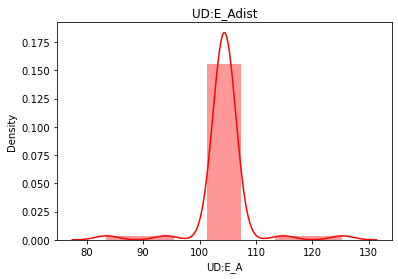

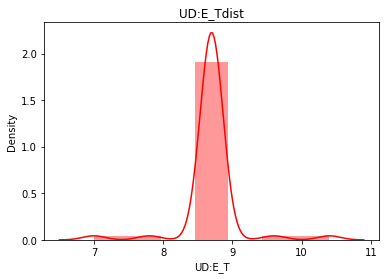

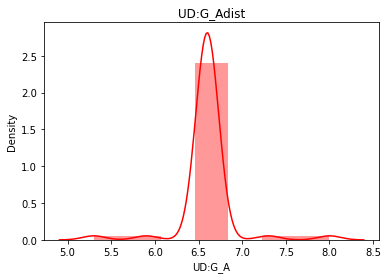

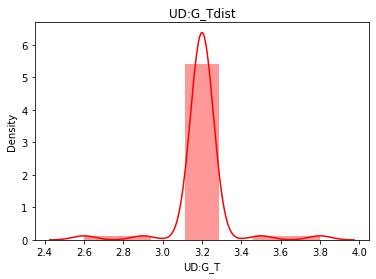

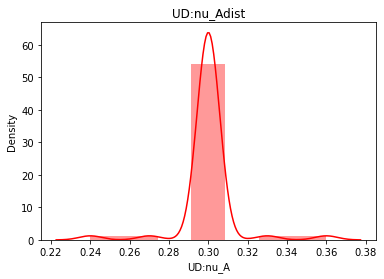

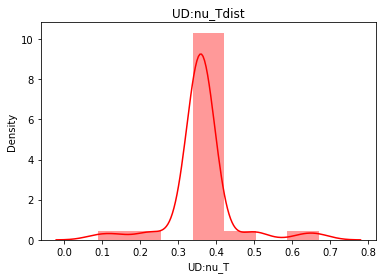

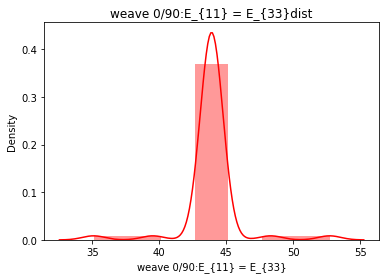

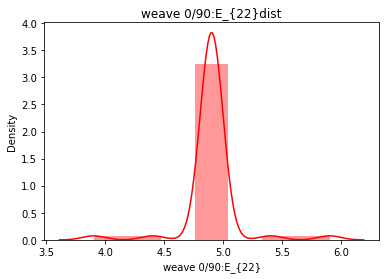

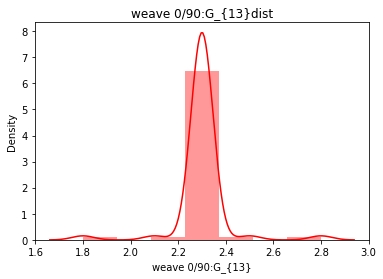

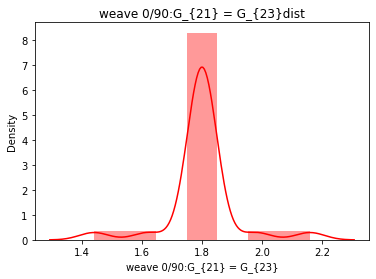

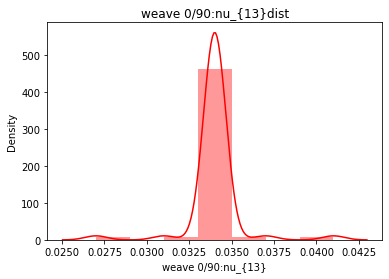

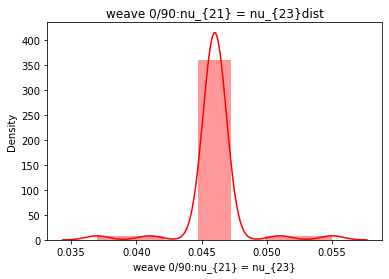

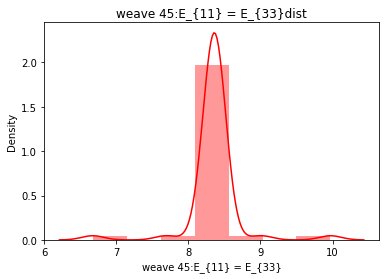

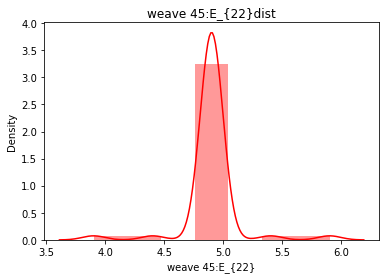

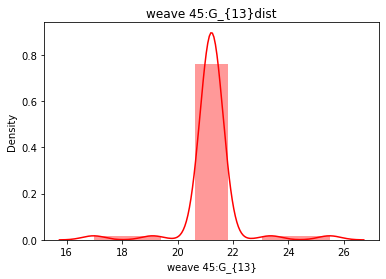

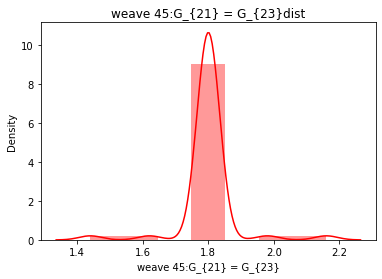

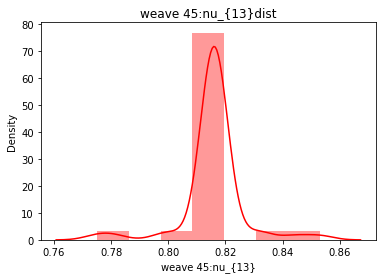

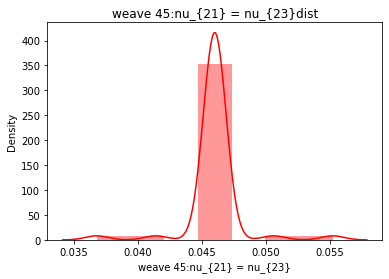

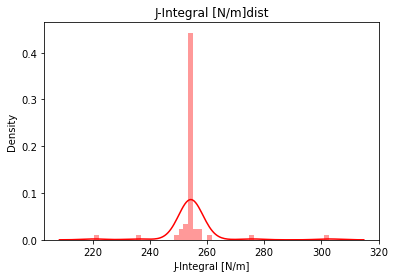

In [4]:
for i in dataset.columns :
    if i != "Model Properties change":
        sns.distplot(dataset[i],color='red').set_title(str(i)+"dist")## dist of the postive tests###
        plt.show()

In [5]:
dummy = pd.get_dummies(dataset['Model Properties change'], prefix='Model Properties change_')
df = pd.merge(
    left=dataset,
    right=dummy,
    left_index=True,
    right_index=True,
)

df
df=df.drop(['Model Properties change'], axis=1)
df

,UD:E_A,UD:E_T,UD:G_A,UD:G_T,UD:nu_A,UD:nu_T,weave 0/90:E_{11} = E_{33},weave 0/90:E_{22},weave 0/90:G_{13},weave 0/90:G_{21} = G_{23},weave 0/90:nu_{13},weave 0/90:nu_{21} = nu_{23},weave 45:E_{11} = E_{33},weave 45:E_{22},weave 45:G_{13},weave 45:G_{21} = G_{23},weave 45:nu_{13},weave 45:nu_{21} = nu_{23},J-Integral [N/m],Model Properties change__E11,Model Properties change__E11+0.1E11,Model Properties change__E11+0.2E11,Model Properties change__E11-0.1E11,Model Properties change__E11-0.2E11,Model Properties change__E22,Model Properties change__E22+0.1E22,Model Properties change__E22+0.2E22,Model Properties change__E22-0.1E22,Model Properties change__E22-0.2E22,Model Properties change__E_A,Model Properties change__E_A+0.1E_A,Model Properties change__E_A+0.2E_A,Model Properties change__E_A-0.1E_A,Model Properties change__E_A-0.2E_A,Model Properties change__E_T,Model Properties change__E_T+0.1E_T,Model Properties change__E_T+0.2E_T,Model Properties change__E_T-0.1E_T,Model Properties change__E_T-0.2E_T,Model Properties change__G13,Model Properties change__G13+0.1G13,Model Properties change__G13+0.2G13,Model Properties change__G13-0.1G13,Model Properties change__G13-0.2G13,Model Properties change__G21,Model Properties change__G21+0.1G21,Model Properties change__G21+0.2G21,Model Properties change__G21-0.1G21,Model Properties change__G21-0.2G21,Model Properties change__G_A,Model Properties change__G_A+0.1G_A,Model Properties change__G_A+0.2G_A,Model Properties change__G_A-0.1G_A,Model Properties change__G_A-0.2G_A,Model Properties change__G_T,Model Properties change__G_T+0.1G_T,Model Properties change__G_T+0.2G_T,Model Properties change__G_T-0.1G_T,Model Properties change__G_T-0.2G_T,Model Properties change__nu13,Model Properties change__nu13+0.1nu13,Model Properties change__nu13+0.2nu13,Model Properties change__nu13-0.1nu13,Model Properties change__nu13-0.2nu13,Model Properties change__nu21,Model Properties change__nu21+0.1nu21,Model Properties change__nu21+0.2nu21,Model Properties change__nu21-0.1nu21,Model Properties change__nu21-0.2nu21,Model Properties change__nu_A,Model Properties change__nu_A+0.1nu_A,Model Properties change__nu_A+0.2nu_A,Model Properties change__nu_A-0.1nu_A,Model Properties change__nu_A-0.2nu_A
2,83.5,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,260.719,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,94,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,257.353,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,104.4,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,254.317,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,114.8,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,251.541,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,125.3,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,248.966,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,104.4,7,6.6,3.2,0.3,0.09,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,254.455,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,104.4,7.8,6.6,3.2,0.3,0.22,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,254.391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,104.4,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,254.317,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,104.4,9.6,6.6,3.2,0.3,0.5,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8

<AxesSubplot:>

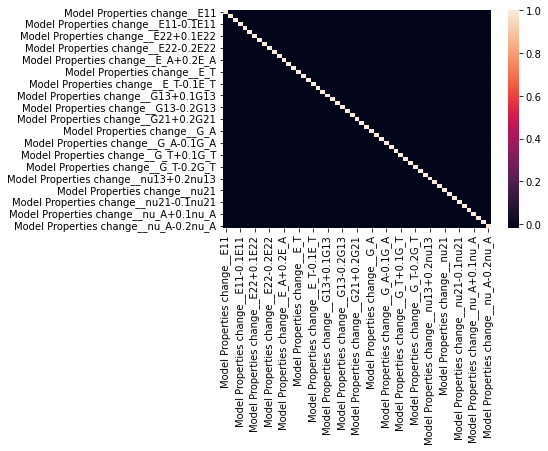

In [6]:
df_corr = df.corr()## show the corr matrix ##
sns.heatmap(df_corr)

In [7]:
y = df.loc[:,"J-Integral [N/m]"].values ## take the y postive
dfn = df.drop(columns=["J-Integral [N/m]"])## drop the y ## 


In [8]:
# Create correlation matrix
corr_matrix = dfn.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
dfn=dfn.drop(dfn[to_drop], axis=1)



In [9]:

prediction_vals = {}# dict for prediction MRSE ##


prediction_vals_r2 = {} #dict for prediction r^2#

prediction_vals_mr2={}#dict for prediction r^2 mean of cross validation#

prediction_vals_std = {}#dict for prediction std of cross validation#


In [10]:
## prediction ## 
x = dfn.values ## last col
x=np.append(arr=np.ones((len(x),1)).astype(int),values=x ,axis=1)## add a colum of 1 to the array for the x0 #

x

array([[1, 83.5, 8.7, ..., 0, 0, 0],
       [1, 94, 8.7, ..., 0, 0, 0],
       [1, 104.4, 8.7, ..., 0, 0, 0],
       ...,
       [1, 104.4, 8.7, ..., 0, 0, 0],
       [1, 104.4, 8.7, ..., 0, 0, 0],
       [1, 104.4, 8.7, ..., 0, 0, 0]], dtype=object)

In [11]:
## prediction train test and validate ## 
X_train, X_test, y_train, y_test =train_test_split(x, y, test_size = 0.33333333333,random_state = 0,shuffle=True)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)


In [12]:
####Ridge##
#prediction####
print("Ridge","prediction stats")
print("_______________________________")
# took from https://machinelearningmastery.com/ridge-regression-with-python/#
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

parameters = {'alpha':arange(0, 10, 0.01)}

# define the model/ estimator
model = Ridge()

# define the grid search
Ridge_reg= GridSearchCV(model, parameters, scoring='r2',cv=10)

Ridge_reg.fit(X_train,y_train)

cvv=pd.DataFrame(Ridge_reg.cv_results_)
# best estimator
print("best alpha is ",Ridge_reg.best_estimator_)

Ridge = Ridge_reg.best_estimator_
Ridge.fit(X_train, y_train)             
pred3 = Ridge.predict(X_test)  
error = y_test-pred3## the postive eror##

RMSE=sqrt(mean_squared_error(y_test,pred3))
score=r2_score(y_test,pred3)
print("Root mean_squared_error is",RMSE)
print("r^2 socre is "+ str(score))

prediction_vals["Ridge regression"]=RMSE
prediction_vals_r2["Ridge regression"]=score
folds=range(1,11)


Ridge prediction stats
_______________________________
best alpha is  Ridge(alpha=0.0)
Root mean_squared_error is 2.1208288772111348
r^2 socre is 0.9009143012753651


In [13]:
####Lasso##
#prediction####
print("Lasso","prediction stats")
print("_______________________________")

parameters = {'alpha':arange(0, 10, 0.01)}

# define the model/ estimator
model = Lasso()

# define the grid search
Lasso_reg= GridSearchCV(model, parameters, scoring='r2',cv=10)

Lasso_reg.fit(X_train,y_train)

# best estimator
print("best alpha is ",Lasso_reg.best_estimator_)

folds=range(1,11)

lasso = Lasso_reg.best_estimator_# Fit the Lasso model
lasso.fit(X_train, y_train)# Create the model score
lassored=lasso.predict(X_test)

RMSE=sqrt(mean_squared_error(y_test,lassored))
score=r2_score(y_test,lassored)
print("Root mean_squared_error is",RMSE)
print("r^2 socre is "+ str(score))

prediction_vals["Lasso regression"]=RMSE
prediction_vals_r2["Lasso regression"]=score



Lasso prediction stats
_______________________________
best alpha is  Lasso(alpha=0.01)
Root mean_squared_error is 1.2188746410943372
r^2 socre is 0.967272125348168


In [15]:
from xgboost import XGBRegressor
xgb1 = XGBRegressor()
parameters = {"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],},
         
grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True,
                   scoring='r2')
# defining parameter range
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
#print(grid.grid_scores_)
print("best parms",grid.best_estimator_)

xgb_model=grid.best_estimator_
xgb_model.fit(X_train, y_train)
yred_xgb = xgb_model.predict(X_test)

RMSE=sqrt(mean_squared_error(y_test,yred_xgb))
score=r2_score(y_test,yred_xgb)
print("Root mean_squared_error is",RMSE)
print("r^2 socre is "+ str(score))

prediction_vals["xgb regression "]=RMSE
prediction_vals_r2["xgb regression "]=score


Fitting 2 folds for each of 360 candidates, totalling 720 fits
best parms XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Root mean_squared_error is 4.396577457545166
r^2 socre is 0.5741769388580259


In [ ]:

print("Polynomial  validation")
best=0
d2=0
rs=[]
for i in range(2,6):
    poly_reg = PolynomialFeatures(degree = i)## make polyni,ail##
    xn = poly_reg.fit_transform(X_train)## make x polynomial##

    lin_reg_2 = LinearRegression()
    lin2=lin_reg_2.fit(xn,y_train)

    #Evalation#
    yolyred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
    RMSE = sqrt(mean_squared_error(y_test,yolyred))
    r2 =adj_r2(X_test,y_test,yolyred)


    if r2>d2 :
        best=i
        d2=r2
    
    rs.append(r2)

print("-----!!!!!!!")
print("The Best Dgree is :"+str(best))
plt.plot(range(2,6),rs)
plt.title('Polynomial predictions model ')
plt.xlabel('parameters')
plt.ylabel('mean_test_score')
plt.show()


Polynomial  validation


In [ ]:
#polynumial regression using 1dgree as the dgree beacuse lowest std in cross validation & have the highest r^2 ## 

#prediction ## 

print("polynumial  test")
print("_______________________")
poly_reg = PolynomialFeatures(best)## make polyni,ail##
xp = poly_reg.fit_transform(X_train)## make x polynomial##

poly_regressor = LinearRegression()
poly_regressor.fit(xp, y_train)

xt = poly_reg.fit_transform(X_test)## make x polynomial##
y_pred = poly_regressor.predict(xt)## the predication of postive ## 
error = y_test-y_pred## the postive eror##
error


print("_________________")
RMSE=sqrt(mean_squared_error(y_test,y_pred))
score=adj_r2(X_test,y_test,y_pred)
print("Root mean_squared_error is",RMSE)
print("adj r^2 socre is ",score)

prediction_vals["polynumial regression"]=RMSE
prediction_vals_r2["polynumial regression"]=score



In [ ]:
from sklearn.svm import SVR


In [ ]:
print("prediction svr ")
print("_______________________________")
param_grid = {'max_depth':[1,5,10,15,20,None],'n_estimators':range(1,150)}
regressor = SVR(kernel = 'rbf')
param_grid = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
grid = GridSearchCV(estimator = regressor, param_grid = param_grid, cv = 10,n_jobs=-1)
g_search=grid.fit(X_train, y_train);
print("Best parameters are ",grid.best_estimator_)

svr =g_search.best_estimator_
# fit the model on the whole dataset
svr.fit(X_train, y_train)

yred = Random_f.predict(X_test)

RMSE=sqrt(mean_squared_error(y_test,yred))
score=r2_score(y_test,yred)
print("Root mean_squared_error is",RMSE)
print("r^2 socre is "+ str(score))

prediction_vals["svr regression "]=RMSE
prediction_vals_r2["svr regression "]=score


In [ ]:
prediction_vals_r2

In [ ]:
df1 = pd.DataFrame(list(prediction_vals_r2.items()), columns=['name', 'r2_score'])
df2 = pd.DataFrame(list(prediction_vals.items()), columns=['name', 'RMSE_score'])
df5=pd.DataFrame(list(prediction_vals_std.items()), columns=['name', 'std_score'])
df7=pd.DataFrame(list(prediction_vals_mr2.items()), columns=['name', 'mean_kfold_r^2'])

df=merge_fix_cols(df1,df2,'name')
df=merge_fix_cols(df,df5,'name')
df=merge_fix_cols(df,df7,'name')


df=merge_fix_cols(df,df,'name')

In [ ]:
## random forest and knn made big fail ## 